# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополненительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайте ниже будут подсказки как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [2]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np



2.4.0


####Вспомогательный код

In [80]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

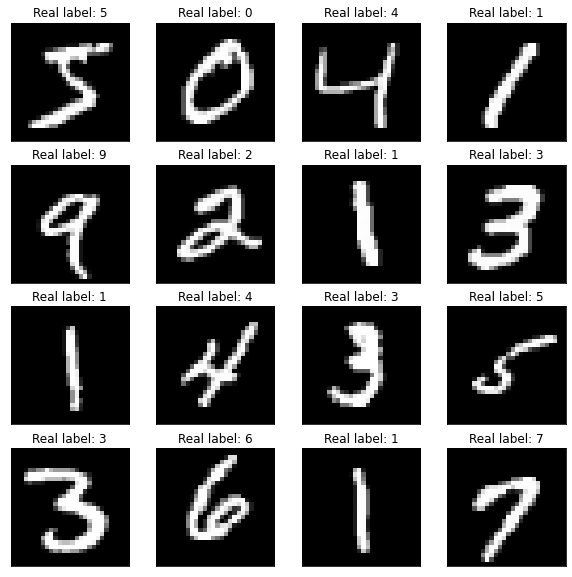

In [6]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [7]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Mounted at /content/drive/


In [100]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку, 
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

In [101]:
path = Path("model_1")
path.mkdir(exist_ok=True) # создаем папку на диске
cpt_filename = "{epoch:02d}_checkpoint_{accuracy:.4f}, loss={loss:.4f}, val_acc={val_accuracy:.4f}.hdf5"  
cpt_path = str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [102]:
# < YOUR CODE STARTS HERE >
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape = x_train.shape, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

optimizer = tf.keras.optimizers.RMSprop()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, verbose=1, batch_size=64, shuffle=True, callbacks =[checkpoint] )





# < YOUR CODE ENDS HERE >

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5173 - accuracy: 0.8566 - val_loss: 0.1710 - val_accuracy: 0.9470

Epoch 00001: accuracy improved from -inf to 0.91183, saving model to model_1/01_checkpoint_0.9118, loss=0.3104, val_acc=0.9470.hdf5
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1552 - accuracy: 0.9537 - val_loss: 0.1251 - val_accuracy: 0.9620

Epoch 00002: accuracy improved from 0.91183 to 0.95730, saving model to model_1/02_checkpoint_0.9573, loss=0.1430, val_acc=0.9620.hdf5
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.9690 - val_loss: 0.1232 - val_accuracy: 0.9616

Epoch 00003: accuracy improved from 0.95730 to 0.96915, saving model to model_1/03_checkpoint_0.9692, loss=0.1057, val_acc=0.9616.hdf5
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.1035 - val_accuracy: 0.9674

Epoch 00004: accuracy impr

In [90]:
! ls "model_1/"

'01_checkpoint_0.9074, loss=0.3232, val_acc=0.9482.hdf5'
 01_checkpoint_0.9095.hdf5
 01_checkpoint_0.9103.hdf5
 01_checkpoint_0.9112_0.3111.hdf5
 01_checkpoint_0.9115_loss0.3129.hdf5
'01_checkpoint_0.9125, loss=0.3101, val_acc=0.9504.hdf5'
 01_checkpoint_0.9131.hdf5
'02_checkpoint_0.9554, loss=0.1527, val_acc=0.9602.hdf5'
 02_checkpoint_0.9561_0.1479.hdf5
'02_checkpoint_0.9574, loss=0.1434, val_acc=0.9629.hdf5'
 02_checkpoint_0.9575.hdf5
 02_checkpoint_0.9586.hdf5
 02_checkpoint_0.9592_loss0.1400.hdf5
 03_checkpoint_0.9665_0.1098.hdf5
'03_checkpoint_0.9665, loss=0.1132, val_acc=0.9673.hdf5'
 03_checkpoint_0.9675.hdf5
'03_checkpoint_0.9688, loss=0.1056, val_acc=0.9717.hdf5'
 03_checkpoint_0.9694.hdf5
 03_checkpoint_0.9694_loss0.1022.hdf5
'04_checkpoint_0.9721, loss=0.0922, val_acc=0.9695.hdf5'
 04_checkpoint_0.9736_0.0878.hdf5
 04_checkpoint_0.9742.hdf5
'04_checkpoint_0.9744, loss=0.0852, val_acc=0.9672.hdf5'
 04_checkpoint_0.9754_loss0.0827.hdf5
 04_checkpoint_0.9757.hdf5
'05_checkpoin

In [103]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

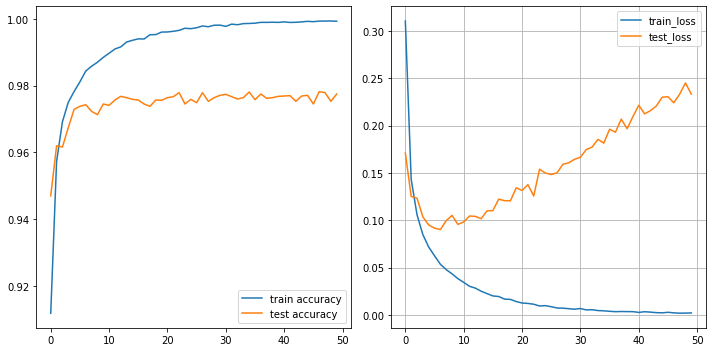

In [104]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [109]:
restored_model = tf.keras.models.load_model("model_1/50_checkpoint_0.9996, loss=0.0016, val_acc=0.9758.hdf5")
loss, accuracy = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {accuracy*100 :.2f}%")
assert accuracy > 0.96

313/313 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.9758
Accuracy of restored model 97.58%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


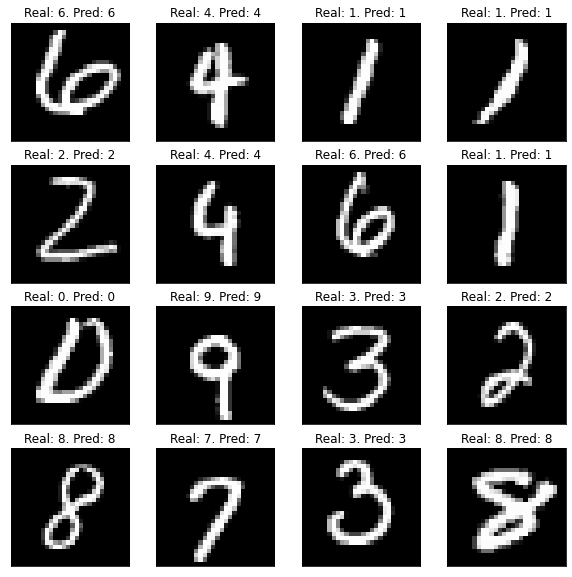

In [110]:
predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])